In [2]:
import os
import sys
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import seaborn as sns
import json

from pyproj import Proj, transform, CRS
from pprint import pprint

In [4]:
DATA_DIR = "../../data"

In [16]:
with open(os.path.join(DATA_DIR, "katastar_sample.json"), "r") as fp:
    sample_req = json.load(fp)

In [17]:
sample_req

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': 'BZP_CESTICE.fid--cba430d_186ac0b857c_c57',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[462861.59, 5074625.22],
      [462857.89, 5074615.19],
      [462862.61, 5074613.49],
      [462870.43, 5074610.61],
      [462871.85, 5074610.09],
      [462873.78, 5074609.34],
      [462884.03, 5074605.36],
      [462886.84, 5074612.35],
      [462887.98, 5074615.18],
      [462879, 5074618.36],
      [462878.71, 5074618.46],
      [462878.41, 5074618.58],
      [462866.55, 5074623.26],
      [462866.17, 5074623.41],
      [462865.17, 5074623.8],
      [462861.59, 5074625.22]]]},
   'geometry_name': 'GEOM',
   'properties': {'CESTICA_ID': 21415887,
    'KATASTARSKA_OPCINA_ID': 2013,
    'BROJ': '1545',
    'PODBROJ': None,
    'VRSTA': 0,
    'BROJ_CESTICE': '1545',
    'OPISNA_ADRESA': 'Ulica Vladimira Vidrića',
    'BROJ_ULOSKA': None,
    'POVRSINA_ATRIBUTNA': 294,
    'POVRSINA_GRAFICKA': 293.3,
    'DETALJN

In [18]:
sample_req.get("bbox")

[462857.89, 5074605.36, 462887.98, 5074625.22]

In [19]:
def convert_to_wgs84(epsg_3765_coords):
    inProj = Proj(init='EPSG:3765')
    outProj = Proj(init='EPSG:4326')
    x1, y1 = epsg_3765_coords
    x2,y2 = transform(inProj,outProj,x1,y1)
    return (x2,y2)

In [20]:
convert_to_wgs84(sample_req.get("bbox")[:2])

/Users/markodo/opt/anaconda3/envs/ml_env/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/markodo/opt/anaconda3/envs/ml_env/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/rh/hzpp0rc56q19lj4g840yvmgh0000gq/T/ipykernel_34062/1170883226.py:5: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stab

(16.02210226575646, 45.81030825855794)

In [21]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

In [22]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


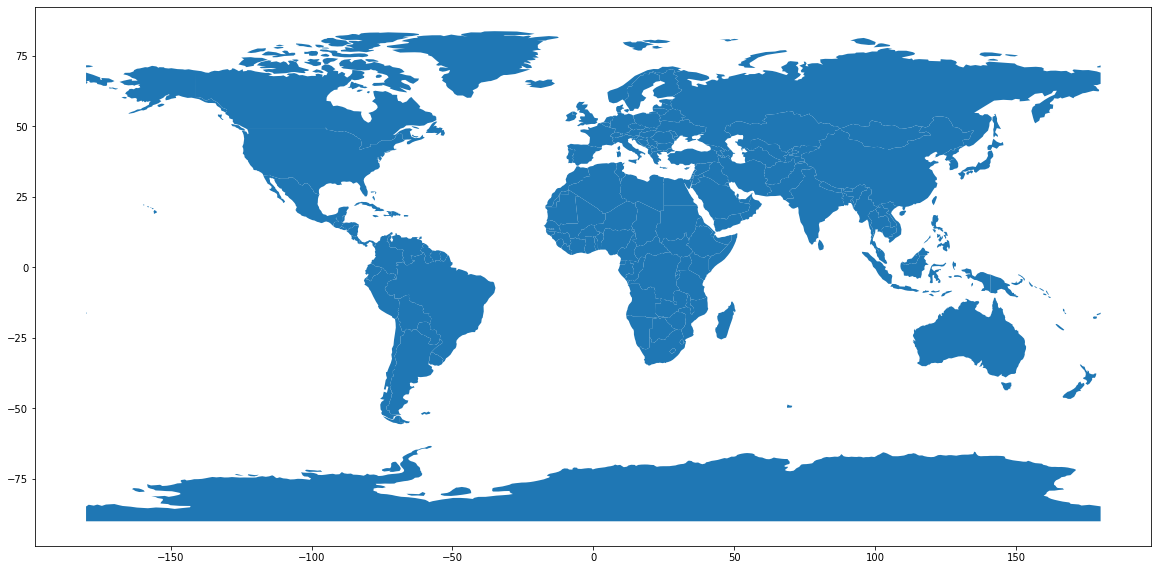

In [23]:
world.plot(figsize=(20,15))
plt.show()

In [24]:
world.explore()

In [25]:
from shapely.geometry import Polygon

In [26]:
sample_coords = sample_req.get("features")[0].get("geometry").get("coordinates")[0]
poly = Polygon(sample_coords)

In [27]:
sample_req.get("features")[0].get("geometry").get("coordinates")[0]

[[462861.59, 5074625.22],
 [462857.89, 5074615.19],
 [462862.61, 5074613.49],
 [462870.43, 5074610.61],
 [462871.85, 5074610.09],
 [462873.78, 5074609.34],
 [462884.03, 5074605.36],
 [462886.84, 5074612.35],
 [462887.98, 5074615.18],
 [462879, 5074618.36],
 [462878.71, 5074618.46],
 [462878.41, 5074618.58],
 [462866.55, 5074623.26],
 [462866.17, 5074623.41],
 [462865.17, 5074623.8],
 [462861.59, 5074625.22]]

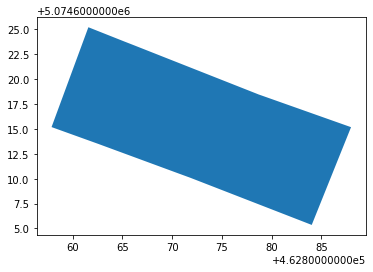

In [28]:
gpd_series = gp.GeoSeries(poly, crs=3765)
gpd_series.plot()
plt.show()  

In [29]:
import pyproj
from shapely.geometry import Point

In [30]:
gpd_series.set_crs("EPSG:3765")
gpd_series_wgs = gpd_series.to_crs("EPSG:4326")

<AxesSubplot:>

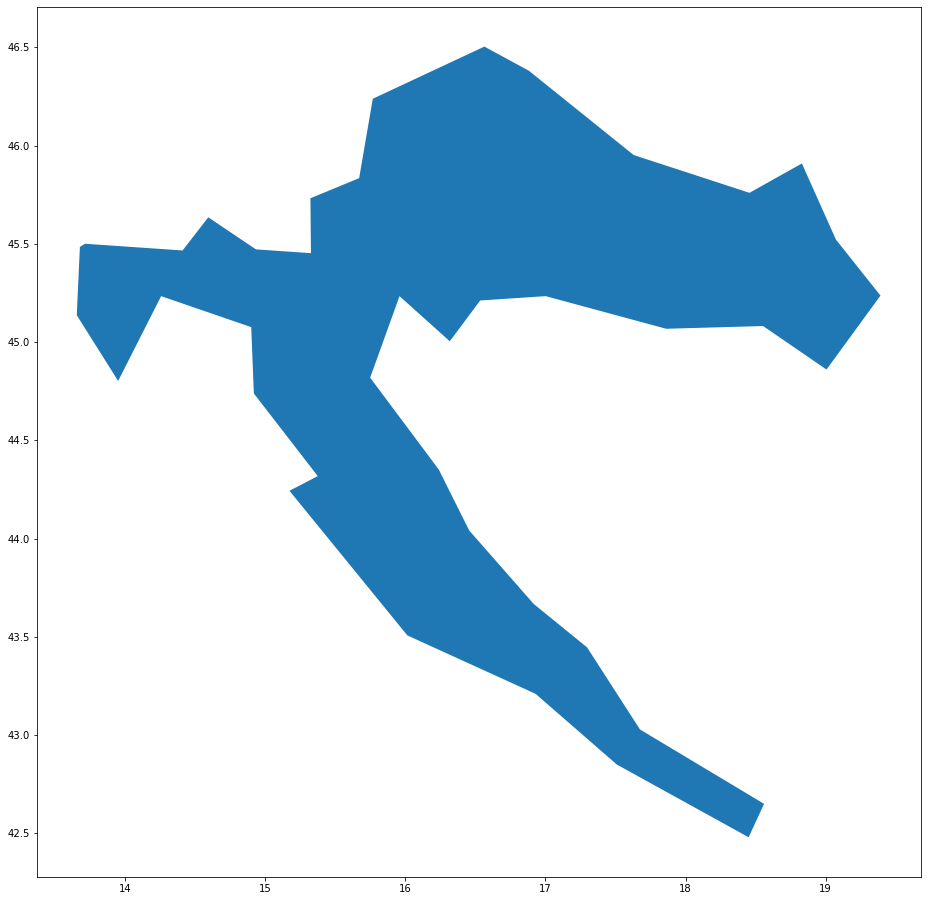

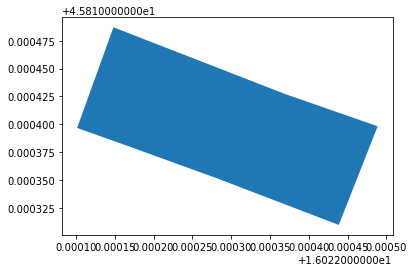

In [31]:
croatia = world[world.name == "Croatia"]["geometry"]
croatia.plot(figsize=(20,16))
gpd_series_wgs.plot()

In [32]:
croatia.explore()

In [33]:
gpd_series_wgs.geometry

0    POLYGON ((16.02215 45.81049, 16.02210 45.81040...
dtype: geometry

In [34]:
gpd_series_wgs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [35]:
croatia.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [36]:
import folium

m = croatia.explore(name="rvacka", color="green")
m = gpd_series_wgs.explore(m=m, color="red", name="cestice")
folium.LayerControl().add_to(m)

m